This notebook will analyze the intensities and errors of CO 2-1 emission at the locations of all of the SNe in our sample across all of the resolutions in the survey.

We will use this to uncover what resolution will be best for this study.

In [9]:
import numpy as np
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.io import ascii

import sys
#sys.path.append('/home/mayker.1/Desktop/NessPythonFunctions')
sys.path.append('/Users/nessmayker/Desktop/NessPythonFunctions')
from detectionFraction import detecFrac
from cumulativeDistFunc import makeCDF
from findPercentiles import findStats

In [10]:
#import SNe data 

SNe_Gal_File = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(SNe_Gal_File, format='csv') 

intenFile = '../Data/3.IntenData.csv'
intenData = Table.read(intenFile, format='csv')

database  = join(SNe_Gal_Data, intenData, keys=('SN_name', 'galaxy'))


In [11]:
database

galaxy,SN_name,SN_type,SN_ra,SN_dec,SN_xCoord,SN_yCoord,SN_co21int,SN_co21err,SN_co21ew,map_beamsize,orient_ra,orient_dec,dist,orient_posang,orient_incl,size_r25,telOrient,NatRes,NatInt,pc60Int,pc90Int,pc120Int,pc150Int,pc500Int,pc750Int,pc1000Int,NatErr,pc60Err,pc90Err,pc120Err,pc150Err,pc500Err,pc750Err,pc1000Err,NatEW,pc60EW,pc90EW,pc120EW,pc150EW,pc500EW,pc750EW,pc1000EW,NatSNR,pc60SNR,pc90SNR,pc120SNR,pc150SNR,pc500SNR,pc750SNR,pc1000SNR,alphaCO
str8,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ngc1566,ASASSN-14ha,II,65.0059,-54.9381,258.9038295074317,423.1062029210927,68.05383,1.8849889,12.188041,0.0003484111476313,65.00159,-54.93801,17.69,214.7,29.5,216.83093,12m+7m+tp,107.5715044627487,68.0538330078125,nan,nan,65.95396423339844,61.926334381103516,27.371265411376953,26.06928253173828,27.377416610717773,1.8849889039993286,nan,nan,1.6742128133773804,1.3591481447219849,0.5764862298965454,0.3906446397304535,0.27018043398857117,12.188040733337402,nan,nan,12.932862281799316,13.762829780578613,19.730430603027344,29.85703468322754,43.81895446777344,36.10304170142571,nan,nan,39.39401473122755,45.56260818335635,47.47947824580116,66.73400804814882,101.33012300911419,4.304510126195559
ngc4321,SN1901B,I,185.6971,15.8238,545.5920792633563,276.5735561756638,5.0824146,1.0344207,2.544713,0.000462934650464,185.72887,15.822304,15.21,156.2,38.5,182.86105,12m+7m+tp,122.89275219530901,5.6628522872924805,nan,nan,5.6628522872924805,5.4790143966674805,6.016371250152588,5.822849273681641,5.013950347900391,1.029056191444397,nan,nan,1.029056191444397,0.8251489996910095,0.23007987439632416,0.13967318832874298,0.08780597150325775,2.744281053543091,nan,nan,2.744281053543091,4.029609203338623,10.151252746582031,13.131563186645508,13.50499439239502,5.502957306290559,nan,nan,5.502957306290559,6.640030344482253,26.149054826886275,41.68909826828498,57.102612294590514,7.542486704286047
ngc5236,SN1923A,II,204.2883,-29.8389,399.09014170428725,813.7841220160797,3.1662843,0.6370633,6.310522,0.000594044605435,204.2539,-29.865625,4.89,225.0,24.0,408.43347,12m+7m+tp,50.69968757298903,3.1662843227386475,2.982912540435791,2.6480391025543213,2.569227695465088,2.6020655632019043,4.148641109466553,4.5491557121276855,5.028407096862793,0.6370633244514465,0.5877888202667236,0.46251943707466125,0.36471322178840637,0.2875167727470398,0.03622424229979515,0.017963431775569916,0.015305337496101856,6.310522079467773,5.9792962074279785,5.600820541381836,6.416561603546143,7.461651802062988,6.986499786376953,7.857295036315918,8.778962135314941,4.970124948669784,5.07480312245854,5.725249341525223,7.044514818702302,9.050134843754762,114.52664972622529,253.2453580676322,328.5394456766136,6.692307692307692
ngc4303,SN1926A,II,185.4754,4.4934,248.12510207394456,387.43756648042245,-0.81909573,0.8172306,nan,0.000503635821363,185.47888,4.473744,16.99,312.4,23.5,206.59573,12m+7m+tp,149.34385530047734,-0.7315931916236877,nan,nan,nan,-0.7315931916236877,0.13160844147205353,0.38786447048187256,0.5659606456756592,0.8364595770835876,nan,nan,nan,0.8364595770835876,0.30151838064193726,0.19038888812065125,0.1036238819360733,nan,nan,nan,nan,nan,nan,nan,1.8840171098709106,-0.8746306595884423,nan,nan,nan,-0.8746306595884423,0.43648563378410676,2.0372222050904525,5.461681565112629,6.037231630177928
ngc1511,SN1935C,unclassified,59.9373,-67.6374,112.46713980638378,194.45954575675466,2.5883038,0.76610756,nan,0.0004017774799122,59.90246,-67.63393,15.28,297.0,72.7,110.94844,12m+7m+tp,107.1485534400328,2.5365307331085205,nan,nan,2.2158656120300293,1.6356202363967896,0.9448716640472412,1.5689282417297363,1.971544861793518,0.7649294137954712,nan,nan,0.64976251

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def setupBar(low, high, resArray, resStr):
    '''
    set up figure 2 barplot.
    
    '''
    lowStr = "No or Weak Detection (SNR < " + str(low) + ")"
    midStr = "Moderate Detection (" + str(low) + " < SNR < " + str(high) + ")"
    upStr  = "Strong Detection (" + str(high) + " < SNR)" 

    x = [lowStr, midStr, upStr]
    x_pos = [i for i, _ in enumerate(x)]

    lowCtr, midCtr, upCtr = 0,0,0

    for i in range(len(resArray)):
        if resArray[i] < low:
            lowCtr += 1
        elif resArray[i] > low and resArray[i] < high:
            midCtr += 1
        elif resArray[i] > high:
            upCtr += 1
    
    bars = [lowCtr, midCtr, upCtr]

    return(x, x_pos, bars)    


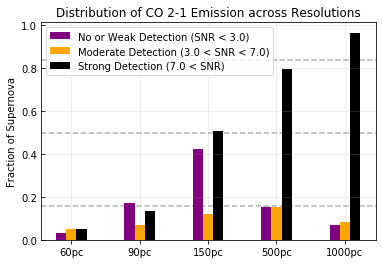

In [5]:
low, high = 3.0, 7.0
x60, x_pos60, bar60     = setupBar(low, high, database['pc60SNR'], '60pc')
x90, x_pos90, bar90     = setupBar(low, high, database['pc90SNR'], '90pc')
x150, x_pos150, bar150   = setupBar(low, high, database['pc150SNR'], '150pc')
x500, x_pos500, bar500   = setupBar(low, high, database['pc500SNR'], '500pc')
x1000, x_pos1000, bar1000 = setupBar(low, high, database['pc1000SNR'], '1000pc')


N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.15  # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True, alpha = 0.25)
ax.axhline(y=0.16, ls = '--', color = 'k', alpha = 0.3, zorder=0)
ax.axhline(y=0.50, ls = '--', color = 'k', alpha = 0.3)
ax.axhline(y=0.84, ls = '--', color = 'k', alpha = 0.3)
rects1 = ax.bar(ind[0], bar60[0]/59, width, color='purple')
rects2 = ax.bar(ind[1], bar90[0]/59, width, color='purple')
rects3 = ax.bar(ind[2], bar150[0]/59, width, color='purple')
rects4 = ax.bar(ind[3], bar500[0]/59, width, color='purple')
rects7 = ax.bar(ind[4], bar1000[0]/59, width, color='purple')
rects1 = ax.bar(ind[0]+width, bar60[1]/59, width, color='orange')
rects2 = ax.bar(ind[1]+width, bar90[1]/59, width, color='orange')
rects3 = ax.bar(ind[2]+width, bar150[1]/59, width, color='orange')
rects4 = ax.bar(ind[3]+width, bar500[1]/59, width, color='orange')
rects8 = ax.bar(ind[4]+width, bar1000[1]/59, width, color='orange')
rects1 = ax.bar(ind[0]+2*width, bar60[2]/59, width, color='black')
rects2 = ax.bar(ind[1]+2*width, bar90[2]/59, width, color='black')
rects3 = ax.bar(ind[2]+2*width, bar150[2]/59, width, color='black')
rects4 = ax.bar(ind[3]+2*width, bar500[2]/59, width, color='black')
rects9 = ax.bar(ind[4]+2*width, bar1000[2]/59, width, color='black')
ax.set_ylabel('Fraction of Supernova')
ax.set_title('Distribution of CO 2-1 Emission across Resolutions')
ax.set_xticks(ind + width)
ax.tick_params(axis='y', direction='in')
ax.set_xticklabels(['60pc', '90pc', '150pc', '500pc', '1000pc'])

ax.legend((rects7[0], rects8[0],rects9[0]), (x60))
plt.show()
fig.savefig('../Figures/SNR_Dist_BySNR.png')

Wefind that the 50th percentile SNR value at 60pc is 3.9, at90pc it is 6.0, 7.7 at 150pc, and then rises rapidly to 25at 500pc.  Statement:  something like We detect almost100% at 1kpc scales and 50% at MC cloud scales.  Spellout the 40-40-20 (?)  of the high resolution compare withthe numbers from the lower resolution. . . (shatter secondparagraph into more than one paragraph) (we detect ev-erything at 1kpc 1 paragraph, split of others gets anotherparagraph

In [31]:

def percentiles(array):

    vals = np.sort(array)
    
    for i in range(len(vals)):
        if vals[i] < 0.0:
            vals[i] = 0.0
    
    vals = vals[np.isfinite(vals)]
    
    percentile = np.linspace(0,1,len(vals))
    stats = findStats(percentile, vals)

    return(stats, len(vals))

In [33]:
stats60, len60 = percentiles(database['pc60SNR'])
stats90, len90 = percentiles(database['pc90SNR'])
stats120, len120 = percentiles(database['pc120SNR'])
stats150, len150 = percentiles(database['pc150SNR'])
stats500, len500 = percentiles(database['pc500SNR'])
stats750, len750 = percentiles(database['pc750SNR'])
stats1000, len1000 = percentiles(database['pc1000SNR'])



print(len60)
print(len90)
print(len120)
print(len150)
print(len500)
print(len750)
print(len1000)


columns  = ["Resolution", "Sample Size", "5th Percentile" ,"16th Percentile" ,"50th Percentile" ,"84th Percentile" ,"95th Percentile"]
stats_60 = ["60pc", len60, 0.69, 2.86, 5.71, 95.2, 171.16]
stats_90 = ["90pc", len90, 0.0, 1.28, 5.73, 36.83, 144.85]
stats_120 = ["120pc", len120, 0.0, 0.58, 6.48, 42.76, 137.31]
stats_150 = ["150pc", len150, 0.0, 0.79, 7.59, 61.79, 149.61]
stats_500 = ["500pc", len500, 0.0, 3.46, 18.82, 229.35, 471.39]
stats_750 = ["750pc", len750, 0.0, 5.19, 29.95, 360.06, 553.04]
stats_1000 = ["1000pc", len1000, 0.0, 7.43, 46.18, 409.46, 641.17]




8
22
50
62
65
66
66


In [ ]:
\CH{"Resolution"} &
\CH{"Sample Size"} &
\CH{"5th Percentile"} &
\CH{"16th Percentile"} &
\CH{"50th Percentile"} &
\CH{"84th Percentile"} &
\CH{"95th Percentile"}}
"60pc" & len60 & 0.69 & 2.86 & 5.71 & 95.2 & 171.16 \\
90pc & 22 & 0.0 & 1.28 & 5.73 & 36.83 & 144.85 \\
120pc & 50 & 0.0 & 0.58 & 6.48 & 42.76 & 137.31 \\
150pc & 62 & 0.0 & 0.79 & 7.59 & 61.79 & 149.61 \\
500pc & 65 & 0.0 & 3.46 & 18.82 & 229.35 & 471.39 \\
750pc & 66 & 0.0 & 5.19 & 29.95 & 360.06 & 553.04 \\
1kpc & 66 & 0.0 & 7.43 & 46.18 & 409.46 & 641.17 \\





In [15]:
pc60

0.6869332329258933
2.861343714855754
3.97460588032487
5.07480312245854
5.711546178213182
71.93103185464543
95.20315799016012
171.15698516602893


In [16]:
percentile

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])